Matriz de Confusão:
[[3 0]
 [0 2]]

Relatório de Classificação:
              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



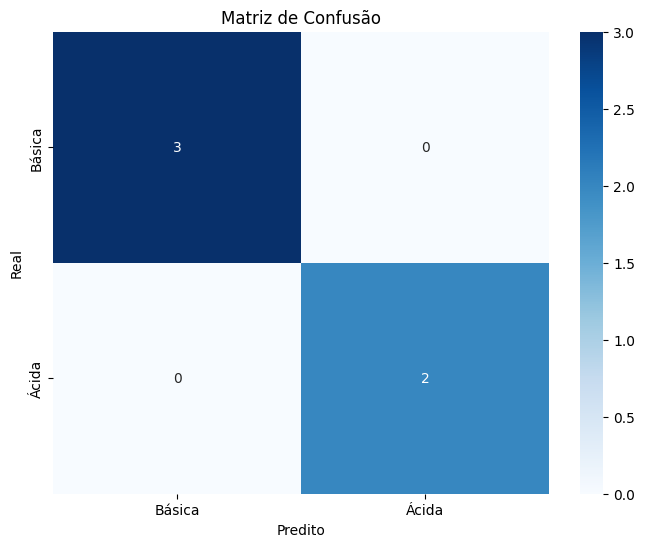

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
data = pd.DataFrame({
    'pH': [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
    'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
    'Cheiro': ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro'],
    'Classe': ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']
})

# 2. Codificar variáveis categóricas
label_encoder_conc = LabelEncoder()
label_encoder_cheiro = LabelEncoder()
label_encoder_classe = LabelEncoder()

data['Concentração'] = label_encoder_conc.fit_transform(data['Concentração'])
data['Cheiro'] = label_encoder_cheiro.fit_transform(data['Cheiro'])
data['Classe'] = label_encoder_classe.fit_transform(data['Classe'])

# Separar características e variável alvo
X = data[['pH', 'Concentração', 'Cheiro']]
y = data['Classe']

# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Treinar o modelo SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Fazer previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliar o modelo
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder_classe.classes_))

# 8. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_classe.classes_, yticklabels=label_encoder_classe.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()
